<a href="https://colab.research.google.com/github/Clinton-Nyaore/PowerLearnProject-WaterPortability/blob/main/water_portability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

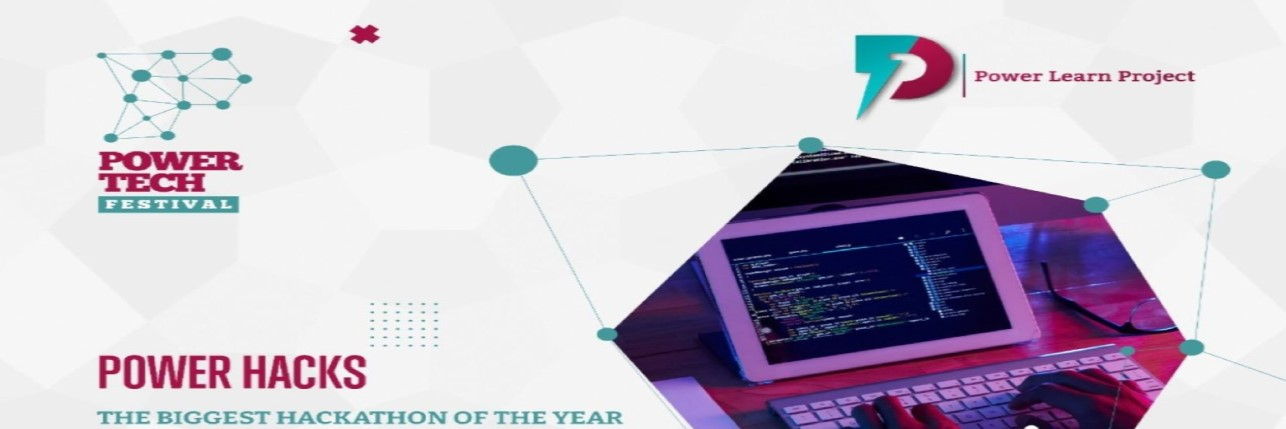

  # <font color="white">**Topic : Water Portability Problem** </font>


#### *The dataset contains information on various physical and chemical parameters of water samples collected from different sources, such as lakes, rivers, and groundwater. The parameters include pH, hardness, solids, chloramines, sulfate, and other variables that can affect water potability.*

#### *Participants in the hackathon can use this dataset to develop machine learning models that predict the water quality parameters and determine whether the water is potable or not. They could also explore different algorithms and techniques to improve the accuracy of their models.*

#### *The goal of the hackathon problem would be to develop a predictive model that could be used by water resource management agencies to monitor and address water quality issues in African rivers. The participants could also explore ways to visualize and present the data in a meaningful way to stakeholders and decision-makers.*

# <font color="white">**Step 1 : Understanding the problem**</font>

#### *The problem at hand is to develop a machine learning model that can predict water quality parameters and determine whether the water is potable or not. The dataset provided contains information on physical and chemical parameters of water samples collected from various sources.* 

#### *The goal is to create a predictive model that can be used by water resource management agencies to monitor and address water quality issues in African rivers.*

#### *Based on the goal of developing a predictive model to determine whether the water is portable or not, this problem can be considered as a binary classification problem. The model should be trained on the available data to accurately classify water samples into two categories: portable and non-portable. The different physical and chemical parameters available in the dataset can be used as input features to the model. The output of the model would be a binary classification label (portable or non-portable) based on the input features. Therefore, this problem can be approached as a binary classification problem.*

 # <font color="white">**Step 2 : Gathering the data**</font>

 #### The dataset for this problem was provided with ten columns, including 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', and 'Potability'. These columns contain physical and chemical parameters of water samples collected from various sources, such as lakes, rivers, and groundwater. The 'Potability' column indicates whether the water sample is portable or not, with a binary value of 1 for portable water and 0 for non-portable water. 

 #### The "Potability" column is the target column which we will try to predict and the other columns are predictors which will be used as features for predicting our target column.

In [1]:
# Let's import the pandas library because it provides a way to read in and organize tabular data.
import pandas as pd

In [2]:
# Now lets import the provided dataset
dataset = pd.read_csv("/content/drive/MyDrive/Data/PLP/water_potability.csv")

# Print out the first 5 rows to see if the dataset was successfully imported
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# <font color="white">**Step 3 : Data Exploration and Preprocessing**</font>

### *We will perform data preprocessing to prepare the provided dataset for use in developing a predictive model to determine water potability. The data preprocessing step involves various tasks, including identifying and handling missing values, removing duplicates and irrelevant data, scaling or normalizing the data, selecting relevant features, splitting the data into training and testing sets, encoding categorical data, and handling class imbalance if present in the dataset.*

### *We will use techniques like imputation to handle missing values and remove duplicates, and correlation analysis or feature importance analysis to select the most relevant features. We will also encode categorical data using techniques like one-hot encoding or label encoding.*

### *Additionally, we will handle class imbalance if present in the dataset using techniques like oversampling or undersampling. Overall, we will perform data preprocessing to ensure that the dataset is in a suitable format to be used by the machine learning model to accurately predict water portability.*

## <font color="white">Data Exploration</font>

In [3]:
# Lets do some data exploration to get a deep understanding of our dataset and see what needs to be done to make it great for our model

# Check the shape of our dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Print the first few rows of the dataset to get an idea of what the data looks like.
print("First 5 rows of the dataset:\n", dataset.head())

First 5 rows of the dataset:
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
# Step 2: Print the shape of the dataset to know how many samples and features we have.
print("Dataset shape:", dataset.shape)
print("We have", dataset.shape[0],"samples")
print("We have", dataset.shape[1],"features")

Dataset shape: (3276, 10)
We have 3276 samples
We have 10 features


In [5]:
# Step 3: Print the column names of the dataset to get a better understanding of the variables included in the dataset.
print("Column names:", list(dataset.columns))

Column names: ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [6]:
# Step 4: Print the data types of the columns to know which variables are categorical and which are numerical.
# We will later use this for data preprocessing 
print("Data types of the columns:\n", dataset.dtypes)

Data types of the columns:
 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [7]:
# Step 5: Print the number of missing values in each column to see if there are any data quality issues that need to be addressed.
# We will impute the missing values later in the data preprocessing step
print("Number of missing values in each column:\n", dataset.isnull().sum()) 

Number of missing values in each column:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [8]:
# Step 6: Print the descriptive statistics of the dataset to get a better understanding of the distribution of the data.
# We will plot the distribution down here to get an insightful description
print("Descriptive statistics of the dataset:\n", dataset.describe())

Descriptive statistics of the dataset:
                 ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162      

In [9]:
# Step 7: Visualize the distribution of each feature using a boxplot to see if there are any outliers and how the data is distributed.
# Any points outside the whiskers of the boxplot is the outlier which we can remove 
# We can use Winsorization to deal with outliers
# Winsorization is a technique that involves replacing extreme values with less extreme values, typically the nearest values within a certain percentile range. 
# This approach can help to reduce the impact of outliers while still retaining some of their information.
"""
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
axs = axs.flatten()

for i, col in enumerate(list(dataset.columns)):
    axs[i].boxplot(dataset[col])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()
"""

'\nfig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))\naxs = axs.flatten()\n\nfor i, col in enumerate(list(dataset.columns)):\n    axs[i].boxplot(dataset[col])\n    axs[i].set_title(col)\n    \nplt.tight_layout()\nplt.show()\n'

In [10]:
# Step 8: Visualize the correlation matrix of the features using a heatmap to identify which features are strongly correlated and which are not. 
# This helps us identify which features might be important for the predictive model.
"""
The correlation coefficient is a statistical measure that indicates the degree to which two variables are linearly related. 
The values in a heatmap can range from -1 to +1, with -1 indicating a perfect negative correlation, 0 indicating no correlation,
and +1 indicating a perfect positive correlation.
If the value is close to +1, it means that there is a strong positive correlation between the two variables, which means that as one variable increases, 
the other variable also increases. If the value is close to -1, it means that there is a strong negative correlation between the two variables, 
which means that as one variable increases, the other variable decreases. If the value is close to 0, it means that there is no correlation between the two variables, 
which means that changes in one variable do not affect the other variable.
"""
"""
plt.figure(figsize=(15, 10))
sns.set(style='ticks')
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()
"""

"\nplt.figure(figsize=(15, 10))\nsns.set(style='ticks')\nsns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')\nplt.xticks(rotation=90)\nplt.show()\n"

In [11]:
# Step 9: Print the unique values of categorical variables to check if there are any unexpected values.
# This step is important because machine learning models typically require categorical variables to be encoded as numerical values.
categorical_vars = ['Potability']
for col in categorical_vars:
    print("Unique values of {}:\n{}".format(col, dataset[col].unique()))

Unique values of Potability:
[0 1]


In [12]:
# Step 10: Visualize the distribution of numerical variables using a histogram
# This helps us see the shape of the distribution and identify any potential outliers or skewed distributions.
"""
 When the distribution is positively skewed, the mean will be greater than the median, and the mode will be less than the median. 
 This is because the skewness pulls the mean towards the tail, while the median is less affected.
"""
"""
numerical_vars = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(17, 12))
sns.set(style='ticks')
dataset[numerical_vars].hist(bins=20, color='blue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()
"""

"\nnumerical_vars = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']\nplt.figure(figsize=(17, 12))\nsns.set(style='ticks')\ndataset[numerical_vars].hist(bins=20, color='blue', edgecolor='black', grid=False)\nplt.tight_layout()\nplt.show()\n"

In [13]:
# Step 11: Visualize the relationship between pairs of variables using a scatter plot matrix
# This helps us identify any linear relationships between pairs of variables and spot any potential outliers.
# It also helps us get a better understanding of how the variables are distributed in the dataset.
"""
Outliers can be identified by visually inspecting the scatter plot matrix and looking for data points that are far away from the main cluster of points, 
or have a very high or very low value in one or more variables compared to other data points.
"""
#sns.set(style='ticks')
#sns.pairplot(dataset[numerical_vars], height=2, diag_kind='kde')
#plt.show()

'\nOutliers can be identified by visually inspecting the scatter plot matrix and looking for data points that are far away from the main cluster of points, \nor have a very high or very low value in one or more variables compared to other data points.\n'

## <font color="white">Data Preprocessing</font>

In [14]:
# Lets import the necessary libraries for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
import pandas as pd


class DataPreprocessing:
    """
    This class performs the full data preprocessing required for our dataset
    """

    def __init__(self, dataset):
        self.data = dataset.copy()

    def preprocess_data(self):
        """
        This method preprocesses the data and returns the preprocessed dataset
        """

        # Impute missing values
        imputer = SimpleImputer(strategy='median')
        imputed_data = imputer.fit_transform(self.data)
        self.data = pd.DataFrame(imputed_data, columns=self.data.columns)

        # Apply winsorization to extreme values in each numerical feature
        for col in self.data.select_dtypes(include='number').columns:
            self.data[col] = winsorize(self.data[col], limits=[0.01, 0.01])

        # Apply power transform to normalize skewed features
        power_transformer = PowerTransformer(method='yeo-johnson')
        transformed_data = power_transformer.fit_transform(self.data.select_dtypes(include='number'))
        self.data.loc[:, self.data.select_dtypes(include='number').columns] = transformed_data

        # Create additional features
        self.data['Hardness_PH_product'] = self.data['ph'] * self.data['Hardness']
        self.data['Hardness_Solids_product'] = self.data['Solids'] * self.data['Hardness']
        self.data['Sulfate_Chloride_ratio'] = self.data['Sulfate'] / self.data['Chloramines']
        self.data['Total_hardness'] = self.data['Hardness'] + self.data['Solids']

        # Convert Potability column to int
        if 'Potability' in self.data.columns:
          self.data['Potability'] = self.data['Potability'].astype(int)

        return self.data

preprocessed_dataset = DataPreprocessing(dataset).preprocess_data()

In [15]:
# Print out the few rows for the preprocessed data and see if it was really preprocessed or not
preprocessed_dataset.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_PH_product,Hardness_Solids_product,Sulfate_Chloride_ratio,Total_hardness
3271,-1.712577,-0.089760,2.334431,0.026235,0.753751,1.233160,-0.114164,0.009657,0.612714,1,0.153721,-0.209539,28.731157,2.244671
3272,0.522223,-0.093758,-0.462025,0.608612,-0.014147,-0.373936,1.718876,0.005414,-1.525022,1,-0.048963,0.043318,-0.023245,-0.555783
3273,1.639638,-0.645196,1.250363,0.145572,-0.014147,0.132589,-0.996982,0.215431,-0.870950,1,-1.057887,-0.806729,-0.097186,0.605167
3274,-1.380594,1.066130,-1.231022,-0.533678,-0.014147,-0.237484,-0.956625,0.715713,0.968439,1,-1.471893,-1.312429,0.026509,-0.164893
3275,0.568212,-0.045564,-0.452311,0.249040,-0.014147,-1.279544,0.574485,0.795208,-2.164558,1,-0.025890,0.020609,-0.056808,-0.497874


In [16]:
preprocessed_dataset.shape

(3276, 14)

# <font color="white">**Step 4 : Splitting the data**</font>

#### *The primary reason for splitting the data is to evaluate the performance of a model on new, unseen data.*

#### *The data is typically split into two sets: the training set and the test set. The training set is used to train the model, and the test set is used to evaluate the model's performance. The test set is completely new to the model, meaning that it has not been used in any way to build the model. This ensures that the evaluation is unbiased, and the model's generalization ability is tested.*

#### *Without splitting the data, a model may perform very well on the data that it was trained on, but it may not perform as well on new, unseen data. This is because the model may have learned to memorize the training data rather than generalize to new data.*

#### *Splitting the data also helps to detect overfitting, which occurs when the model learns the noise in the training data and performs poorly on new data. By evaluating the model on the test set, we can determine if the model has overfit to the training data and adjust it accordingly.*

In [17]:
# Lets import the library we will use for data splitting
from sklearn.model_selection import train_test_split

# Get the features and the target values
y = preprocessed_dataset["Potability"]
X = preprocessed_dataset.drop("Potability", axis=1)

# Now split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# <font color="white">**Step 5 : Choosing the Appropriate Model**</font>

#### *Choosing an appropriate model involves selecting a mathematical or statistical representation that best captures the relationships between the variables in the given data.*

#### *The goal is to choose a model that accurately represents the underlying data-generating process, while also being interpretable and generalizable to new data.*

#### We will train a few models and see which one works pretty fine for our data
  - XGBoost
  - KNNClassifier
  - RandomForestClassifier


In [18]:
"""
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import numpy as np

# Train and evaluate the models
models = []
model_names = ["XGBoost", "KNN Classifier", "Random Forest"]

# XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
models.append(xgb_model)

# KNN Classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
models.append(knn_model)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
models.append(rf_model)

# Evaluate the models on the test set
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_names[i]} Accuracy: {acc}")
"""

'\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nimport xgboost as xgb\nimport numpy as np\n\n# Train and evaluate the models\nmodels = []\nmodel_names = ["XGBoost", "KNN Classifier", "Random Forest"]\n\n# XGBoost model\nxgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)\nxgb_model.fit(X_train, y_train)\nmodels.append(xgb_model)\n\n# KNN Classifier model\nknn_model = KNeighborsClassifier(n_neighbors=5)\nknn_model.fit(X_train, y_train)\nmodels.append(knn_model)\n\n# Random Forest model\nrf_model = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_model.fit(X_train, y_train)\nmodels.append(rf_model)\n\n# Evaluate the models on the test set\nfor i, model in enumerate(models):\n    y_pred = model.predict(X_test)\n    acc = accuracy_score(y_test, y_pred)\n    print(f"{model_names[i]} Accuracy: {acc}")\n'

#### *We will then tune them and see which one improves accuracy*

In [19]:
"""
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the models and their hyperparameters to tune
models = [
    {
        "name": "XGBoost",
        "model": xgb.XGBClassifier(objective="binary:logistic", random_state=42),
        "params": {
            "max_depth": [3, 5, 7],
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.1, 0.05, 0.01]
        }
    },
    {
        "name": "KNN Classifier",
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    {
        "name": "Random Forest",
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7],
            "max_features": ["sqrt", "log2"]
        }
    }
]

# Train and evaluate the models
for model in models:
    print(f"Tuning {model['name']} hyperparameters...")
    grid_search = GridSearchCV(model["model"], model["params"], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    model["model"] = grid_search.best_estimator_
    y_pred = model["model"].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model['name']} Accuracy: {acc}\n")
"""

'\nfrom sklearn.model_selection import train_test_split, GridSearchCV\n\n# Define the models and their hyperparameters to tune\nmodels = [\n    {\n        "name": "XGBoost",\n        "model": xgb.XGBClassifier(objective="binary:logistic", random_state=42),\n        "params": {\n            "max_depth": [3, 5, 7],\n            "n_estimators": [50, 100, 150],\n            "learning_rate": [0.1, 0.05, 0.01]\n        }\n    },\n    {\n        "name": "KNN Classifier",\n        "model": KNeighborsClassifier(),\n        "params": {\n            "n_neighbors": [3, 5, 7],\n            "weights": ["uniform", "distance"]\n        }\n    },\n    {\n        "name": "Random Forest",\n        "model": RandomForestClassifier(random_state=42),\n        "params": {\n            "n_estimators": [50, 100, 150],\n            "max_depth": [3, 5, 7],\n            "max_features": ["sqrt", "log2"]\n        }\n    }\n]\n\n# Train and evaluate the models\nfor model in models:\n    print(f"Tuning {model[\'name\'

#### From the above we can see that XGBoost works pretty fine and so we will use it. 

# <font color="white">**Step 6 : Training the model**</font>

#### *Training the model refers to the process of using a dataset to teach a machine learning algorithm how to make accurate predictions or classifications. The training process involves presenting the model with a set of labeled data, known as the training data, and adjusting the model's parameters or weights to minimize the difference between its predictions and the actual labels.*

#### *The goal of training a model is to find the optimal set of parameters or weights that allow it to accurately predict or classify new, unseen data. This process can involve adjusting various hyperparameters, such as the learning rate or regularization strength, to optimize the model's performance.*

#### *So now we are going to train our XGBoost model by fitting it to the training data.*

In [20]:
# Lets check our model's hyperparameters so that we can tune the correctly
import xgboost as xgb

# Initialize the model passing hyperparameters to it which we can tune
model = xgb.XGBClassifier(learning_rate=0.05, max_depth=7, n_estimators=100)

# Lets fit our model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# <font color="white">**Step 7 : Evaluating the model**</font>

#### *Evaluating a machine learning model means assessing its performance on a dataset that was not used for training. The purpose of evaluation is to understand how well the model can generalize to new data, which is essential for its practical usefulness.*

#### *To evaluate a machine learning model, a test dataset is typically used. In our case, we had split the data to train and test data. We will now use the test data to evaluate our model.*

#### *The performance of the model is then assessed using one or more evaluation metrics, depending on the task. In our case, which is a classification task, common evaluation metrics include accuracy, precision, recall, and F1 score.*

#### *It is important to choose appropriate evaluation metrics that are relevant to the task and meaningful for the application. The choice of metrics can also depend on the relative importance of different types of errors, such as false positives versus false negatives in a binary classification task.*

#### *Here are some common evaluation metrics for binary classification tasks:*
    - Accuracy: the proportion of correctly classified instances out of all instances.
    - Precision: the proportion of true positives out of all positive predictions.
    - Recall: the proportion of true positives out of all actual positives.
    - F1-score: the harmonic mean of precision and recall.
    - Area Under ROC Curve (AUC-ROC): a measure of the classifier's ability to distinguish between positive and negative instances.

In [21]:
# Lets import all the metrics we need to get a general view of how our model performs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict class labels and class probabilities on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Accuracy: 0.6829
Precision: 0.6739
Recall: 0.3633
F1-score: 0.4721
AUC-ROC: 0.6699


Lets check the correctly predicted samples by our model

In [22]:
# Reset the index of X_test
X_test = X_test.reset_index(drop=True)

# Get indices of correct and incorrect predictions
correct_indices = y_test == y_pred
incorrect_indices = y_test != y_pred

# Create boolean indexing arrays
correct_indices = (y_test == y_pred).ravel()
incorrect_indices = ~correct_indices

# Get the corresponding samples and true labels, along with their indexes
correct_samples = X_test[correct_indices]
correct_labels = y_test[correct_indices]
correct_indexes = correct_samples.index.values
correct_preds = y_pred[correct_indices]
incorrect_samples = X_test[incorrect_indices]
incorrect_labels = y_test[incorrect_indices]
incorrect_indexes = incorrect_samples.index.values
incorrect_preds = y_pred[incorrect_indices]
correct_labels[1]

0

In [23]:
# Create DataFrames for correct and incorrect predictions
correct_df = pd.DataFrame(data=correct_samples, index=correct_indexes, columns=X_test.columns)
correct_df["true_label"] = correct_labels
correct_df["predicted_label"] = correct_preds
incorrect_df = pd.DataFrame(data=incorrect_samples, index=incorrect_indexes, columns=X_test.columns)
incorrect_df["true_label"] = incorrect_labels
incorrect_df["predicted_label"] = incorrect_preds

# Print results
print("Correctly predicted samples:")
print(len(correct_df))
print("\nIncorrectly predicted samples:")
print(len(incorrect_df))

# Print overall accuracy
print("\nAccuracy:", accuracy)
incorrect_df.head()

Correctly predicted samples:
448

Incorrectly predicted samples:
208

Accuracy: 0.6829268292682927


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Hardness_PH_product,Hardness_Solids_product,Sulfate_Chloride_ratio,Total_hardness,true_label,predicted_label
0,-0.019588,-0.243214,-0.244397,-0.707790,-0.014147,-0.431942,0.271101,0.782129,-1.622523,0.004764,0.059441,0.019988,-0.487611,NaN,0
8,0.745141,1.083889,-0.131871,-1.285445,0.443183,-0.458471,0.230949,-0.207808,0.929440,0.807650,-0.142933,-0.344770,0.952018,NaN,0
14,-0.662396,0.045319,0.133185,0.169774,-0.014147,0.530754,-0.072888,-0.330580,-0.167607,-0.030019,0.006036,-0.083331,0.178504,NaN,0
15,-0.192903,0.392032,-0.108356,-0.856570,-1.298519,-1.832738,-0.597564,-0.598373,-1.151567,-0.075624,-0.042479,1.515953,0.283676,NaN,1
18,0.347958,1.498272,0.909894,0.991425,-0.014147,-2.039262,-1.305966,2.517950,0.762247,0.521336,1.363268,-0.014270,2.408166,NaN,0


# <font color="white">**Step 8 : Hyperparameter Tuning**</font>

#### *Hyperparameter tuning is the process of selecting the optimal hyperparameters for a machine learning model in order to improve its performance. Hyperparameters are the configuration settings that are specified before training a model, and they are not learned from the data during training.*

#### *Hyperparameter tuning typically involves searching a hyperparameter space using various optimization algorithms to find the set of hyperparameters that result in the best performance on a validation dataset.*

#### *In our case we are going to use a grid search method to tune our xgboost model* 

In [24]:
# Lets check all our model's hyperparameters to know which ones fit for our 
import xgboost as xgb

# create an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# get all the hyperparameters and their current values
hyperparameters = xgb_model.get_params()

print("Our model has",len(hyperparameters),"hyperparameters.\n")
# print the hyperparameters
for param, value in hyperparameters.items():
    print(param, "=", value)

Our model has 40 hyperparameters.

objective = binary:logistic
use_label_encoder = None
base_score = None
booster = None
callbacks = None
colsample_bylevel = None
colsample_bynode = None
colsample_bytree = None
early_stopping_rounds = None
enable_categorical = False
eval_metric = None
feature_types = None
gamma = None
gpu_id = None
grow_policy = None
importance_type = None
interaction_constraints = None
learning_rate = None
max_bin = None
max_cat_threshold = None
max_cat_to_onehot = None
max_delta_step = None
max_depth = None
max_leaves = None
min_child_weight = None
missing = nan
monotone_constraints = None
n_estimators = 100
n_jobs = None
num_parallel_tree = None
predictor = None
random_state = None
reg_alpha = None
reg_lambda = None
sampling_method = None
scale_pos_weight = None
subsample = None
tree_method = None
validate_parameters = None
verbosity = None


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the model and its hyperparameters to tune
model = {
        "name": "XGBoost",
        "model": xgb.XGBClassifier(),
        "params": {
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.05, 0.1, 0.15],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "objective": ["binary:logistic"],
    "scale_pos_weight": [1, 2, 3, 4]
}
    }
#learning_rate=0.05, max_depth=7, n_estimators=100
# Train and evaluate the model
print(f"Tuning {model['name']} hyperparameters...")
grid_search = GridSearchCV(model["model"], model["params"], cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
model["model"] = grid_search.best_estimator_
y_pred = model["model"].predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"{model['name']} Accuracy: {acc}\n")


Tuning XGBoost hyperparameters...


# <font color="white">**Step 9 : Saving the model**</font>

#### Now we are going to save our trained model. Saving a trained machine learning model is important for several reasons:

  - Reusability: Once you have trained a model on a particular dataset, you can reuse the model to make predictions on new, unseen data without having to train the model again from scratch.

  - Deployment: Saving a model allows you to deploy it in a production environment, where it can be used to make predictions on real-time data.

  - Reproducibility: Saving the model allows you to reproduce the results of your experiments, which is important for research and development purposes.

  - Efficiency: Training a machine learning model can be computationally expensive and time-consuming. Saving the model allows you to avoid the need to train the model every time you want to use it.

  - Versioning: Saving a model also allows you to version control your machine learning pipeline, which is important for tracking changes and ensuring reproducibility.

In [ ]:
# Lets save our model using joblib
import joblib
import xgboost as xgb

# Train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Save the model to disk
filename = '/content/drive/MyDrive/Data/PLP/xgboost_model.joblib'
joblib.dump(model, filename)
print("Model saved successfully to ", filename)


# <font color="white">**Step 10 : Making predictions**</font>

#### Lets use our saved model to make predictions on new data. Making predictions using the saved model involves passing new data to the loaded model and getting predictions back from it. The process is as follows:

  - Load the saved model using the serialization library.
  - Prepare the new data that you want to make predictions on. This data should have the same features as the data that the model was trained on.
  - Pass the new data to the predict() method of the loaded model.
  - The predict() method will return the predicted labels for the new data.

In [ ]:
# Load the saved model from disk
loaded_model = joblib.load(filename)

# Create a DataFrame for the new data
water_1_df = pd.DataFrame({
    'ph': [7.741245],
    'Hardness': [218.237186],
    'Solids': [22824.699465],
    'Chloramines': [8.696479],
    'Sulfate': [363.992748],
    'Conductivity': [521.016261],
    'Organic_carbon': [15.310631],
    'Trihalomethanes': [73.723070],
    'Turbidity': [3.741143]
})

# Create a DataFrame for the new data
water_2_df = pd.DataFrame({
    'ph': [7.0],
    'Hardness': [200.0],
    'Solids': [500.0],
    'Chloramines': [6.0],
    'Sulfate': [100.0],
    'Conductivity': [300.0],
    'Organic_carbon': [20.0],
    'Trihalomethanes': [50.0],
    'Turbidity': [4.5]
})

# Preprocess the new data 
preprocessed_water_1 = DataPreprocessing(water_1_df).preprocess_data()
preprocessed_water_2 = DataPreprocessing(water_2_df).preprocess_data()


# Use the loaded model to make predictions on the new data
prediction_1 = loaded_model.predict(preprocessed_water_1)
prediction_2 = loaded_model.predict(preprocessed_water_2)

# Lets store in a dictionary to print them below
my_predictions = {
    "water_1": int(prediction_1),
    "water_2": int(prediction_2)
}

print(my_predictions)
print()

for key, value in my_predictions.items():
  if value == 1:
    print(f"{key} is Portable")

  else:
    print(f"{key} is Not portable")

print(preprocessed_water_1)